In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
sns.set(style='white', rc={'figure.figsize':(12,8)})

import os

import numpy as np
import pandas as pd

import umap
import MulticoreTSNE
import fitsne
import LargeVis
import sklearn.manifold

First we'll get the data using git clone.  For those of you on systems that can't make command line calls you'll have to pull the repo via some alternate means.

We'll add a getTheData boolean so that if you've already run the notebook then you won't accidently clone it a second time.

In [2]:
if not os.path.exists('fashion_mnist'):
    !git clone https://github.com/zalandoresearch/fashion-mnist.git fashion_mnist

Now we jump into the directory you've just created via the clone command above.  If you pulled the repository in another way feel free to swap the 'fashion-mnist' path below for the appropriate one on your system.

In [3]:
import fashion_mnist.utils.mnist_reader as mnist_reader 

train, train_labels = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
test, test_labels = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')
data = np.array(np.vstack([train, test]), dtype=np.float64, order='C') / 255.0
target = np.array(np.hstack([train_labels, test_labels]))

In [4]:
%%time
embedding = umap.UMAP(n_neighbors=5, metric='euclidean', random_state=42).fit_transform(data)

CPU times: user 1min 27s, sys: 8.07 s, total: 1min 35s
Wall time: 1min 22s


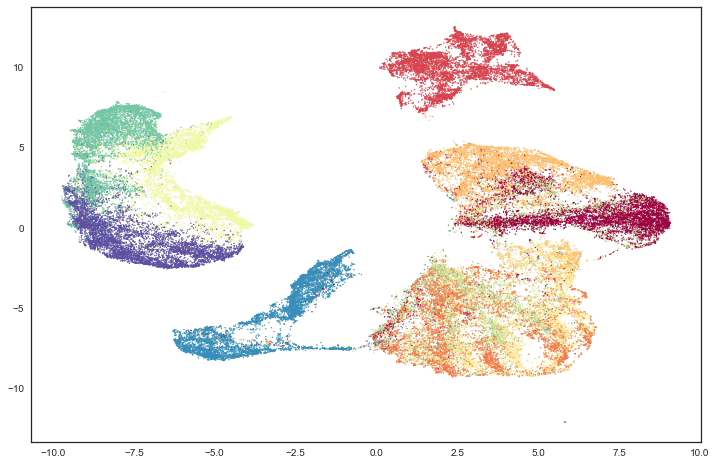

In [5]:
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap="Spectral", s=1)

In [6]:
np.save('umap_fashion_mnist_embedding1.npy', embedding)

In [7]:
output = pd.DataFrame(embedding, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_umap1.csv')

### t-SNE

In [8]:
fit_tsne = MulticoreTSNE.MulticoreTSNE(n_jobs=1, random_state=42)
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 18min 15s, sys: 28.1 s, total: 18min 43s
Wall time: 19min 29s


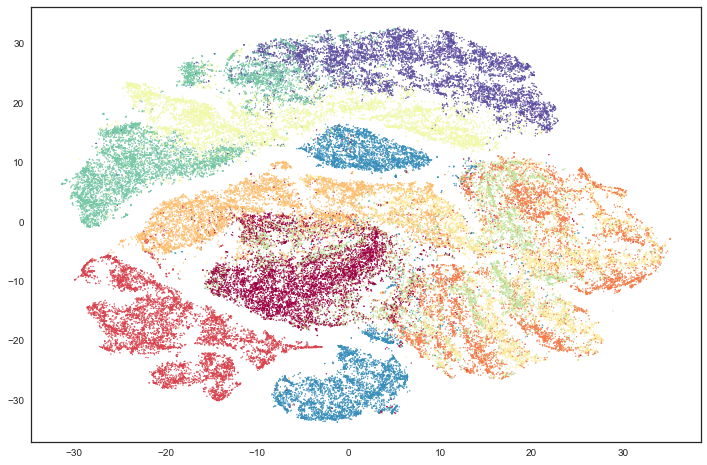

In [9]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=target, cmap="Spectral", s=1)

In [10]:
np.save('tsne_fashion_mnist_embedding1.npy', u_tsne)

In [11]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_tsne1.csv')

## FIt-SNE

In [12]:
%time u_fitsne = fitsne.FItSNE(data.astype(np.double), nthreads=1, rand_seed=42)

CPU times: user 4min 43s, sys: 10.1 s, total: 4min 53s
Wall time: 4min 55s


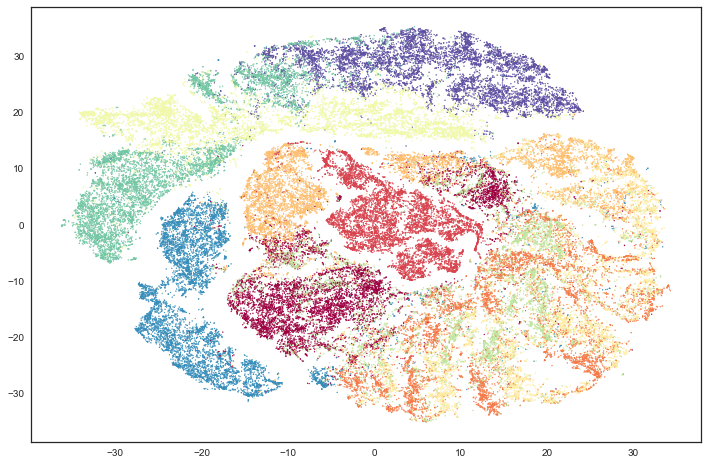

In [13]:
plt.scatter(u_fitsne[:,0], u_fitsne[:,1], c=target, cmap="Spectral", s=1)

In [14]:
np.save('fitsne_fashion_mnist_embedding1.npy', u_fitsne)

In [15]:
output = pd.DataFrame(u_fitsne, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_fitsne1.csv')

## LargeVis

In [16]:
largevis_data = data.astype(np.float32, order='C')
LargeVis.loadarray(largevis_data)

In [17]:
%time u_largevis = LargeVis.run(2, 1)

CPU times: user 35min 6s, sys: 20.2 s, total: 35min 26s
Wall time: 35min 30s


In [18]:
u_largevis = np.array(u_largevis)

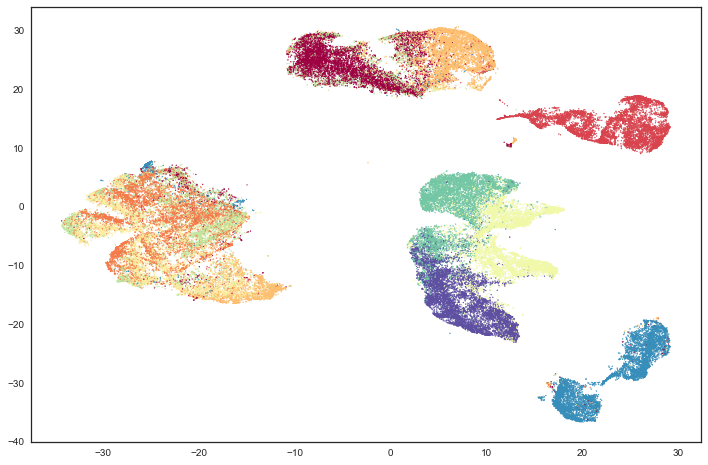

In [20]:
plt.scatter(u_largevis[:,0], u_largevis[:,1], c=target, cmap="Spectral", s=1)

In [21]:
np.save('largevis_fashion_mnist_embedding1.npy', u_largevis)

In [23]:
output = pd.DataFrame(u_largevis, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_largevis1.csv')

### Laplacian Eigenmaps

In [8]:
fit_eigenmaps = sklearn.manifold.SpectralEmbedding(n_neighbors=15)
%time u_eigenmaps = fit_eigenmaps.fit_transform(data)

CPU times: user 18min 15s, sys: 28.1 s, total: 18min 43s
Wall time: 19min 29s


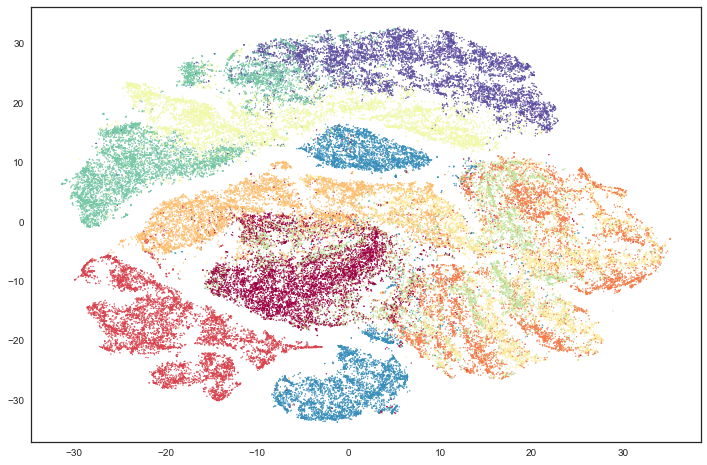

In [9]:
plt.scatter(u_eigenmaps[:,0], u_eigenmaps[:,1], c=target, cmap="Spectral", s=1)

In [10]:
np.save('eigenmaps_fashion_mnist_embedding1.npy', u_eigenmaps)

In [11]:
output = pd.DataFrame(u_eigenmaps, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_eigenmaps1.csv')

### Isomap

In [8]:
fit_isomap = sklearn.manifold.Isomap()
%time u_isomap = fit_isomap.fit_transform(data)

CPU times: user 18min 15s, sys: 28.1 s, total: 18min 43s
Wall time: 19min 29s


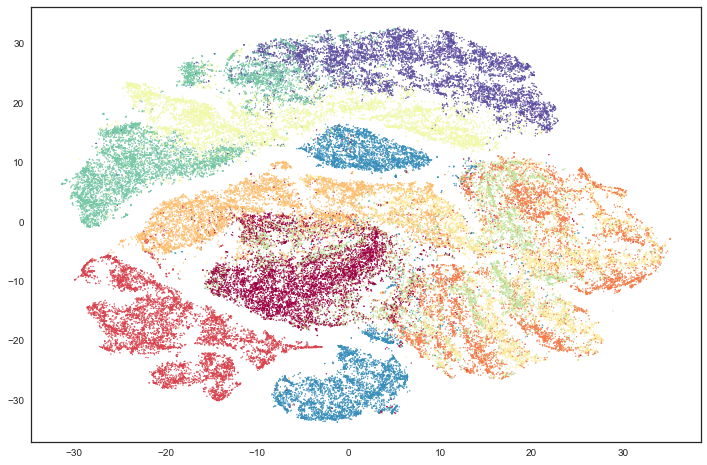

In [9]:
plt.scatter(u_isomap[:,0], u_isomap[:,1], c=target, cmap="Spectral", s=1)

In [10]:
np.save('isomap_fashion_mnist_embedding1.npy', u_isomap)

In [11]:
output = pd.DataFrame(u_isomap, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_isomap1.csv')